# 숙제

* 행렬곱
* 특이값 분해
* 행렬 유사도를 통한 이미지 인식기술 찾아보기

# Numpy 심화


## 이미지 내오기

In [3]:
from scipy import misc

img = misc.face()
img, print(img.shape), print(img.size)

(768, 1024, 3)
2359296


(array([[[121, 112, 131],
         [138, 129, 148],
         [153, 144, 165],
         ...,
         [119, 126,  74],
         [131, 136,  82],
         [139, 144,  90]],
 
        [[ 89,  82, 100],
         [110, 103, 121],
         [130, 122, 143],
         ...,
         [118, 125,  71],
         [134, 141,  87],
         [146, 153,  99]],
 
        [[ 73,  66,  84],
         [ 94,  87, 105],
         [115, 108, 126],
         ...,
         [117, 126,  71],
         [133, 142,  87],
         [144, 153,  98]],
 
        ...,
 
        [[ 87, 106,  76],
         [ 94, 110,  81],
         [107, 124,  92],
         ...,
         [120, 158,  97],
         [119, 157,  96],
         [119, 158,  95]],
 
        [[ 85, 101,  72],
         [ 95, 111,  82],
         [112, 127,  96],
         ...,
         [121, 157,  96],
         [120, 156,  94],
         [120, 156,  94]],
 
        [[ 85, 101,  74],
         [ 97, 113,  84],
         [111, 126,  97],
         ...,
         [120, 156,  95],
  

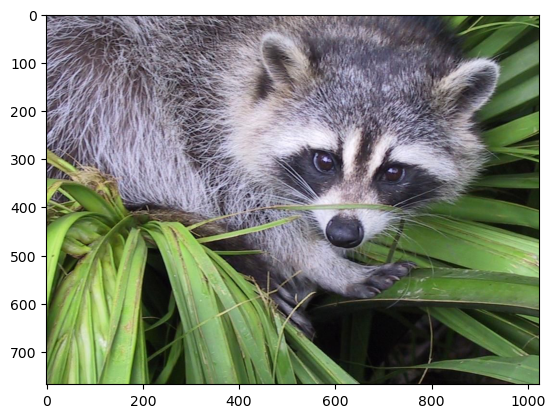

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.show()

In [6]:
img[:,:,1].shape

(768, 1024)

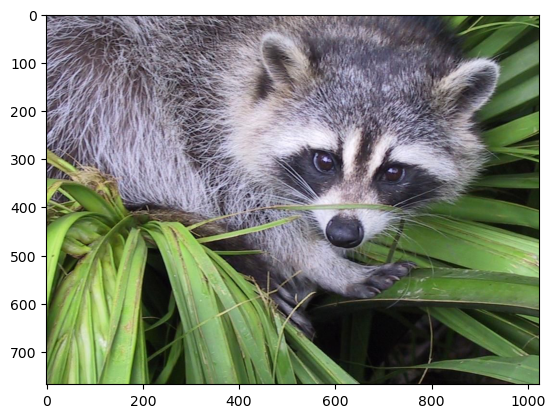

In [16]:
# 0 ~ 1 사이 값으로 원소값을 변환 -> 이후 이미지를 출력해도 동일한 이미지로 나옴
img_array = img / 255
img_array.max(), img_array.min()

plt.imshow(img_array)
plt.show()

In [15]:
print(img_array.shape), print(img_array.size), img

(768, 1024, 3)
2359296


(None,
 None,
 array([[[121, 112, 131],
         [138, 129, 148],
         [153, 144, 165],
         ...,
         [119, 126,  74],
         [131, 136,  82],
         [139, 144,  90]],
 
        [[ 89,  82, 100],
         [110, 103, 121],
         [130, 122, 143],
         ...,
         [118, 125,  71],
         [134, 141,  87],
         [146, 153,  99]],
 
        [[ 73,  66,  84],
         [ 94,  87, 105],
         [115, 108, 126],
         ...,
         [117, 126,  71],
         [133, 142,  87],
         [144, 153,  98]],
 
        ...,
 
        [[ 87, 106,  76],
         [ 94, 110,  81],
         [107, 124,  92],
         ...,
         [120, 158,  97],
         [119, 157,  96],
         [119, 158,  95]],
 
        [[ 85, 101,  72],
         [ 95, 111,  82],
         [112, 127,  96],
         ...,
         [121, 157,  96],
         [120, 156,  94],
         [120, 156,  94]],
 
        [[ 85, 101,  74],
         [ 97, 113,  84],
         [111, 126,  97],
         ...,
         [120,

## 행렬곱 (@)

* 행렬곱 도식
![naver](https://miro.medium.com/max/4800/1*D_1tbv_wNFJ-rrremAGX4Q.png?type=w300)

* 컬러 이미지는 위에서 봤듯, 2차원 배열에 3채널 RGB값을 입힘으로서 나타낼 수 있다.
* 흑백 이미지는 2차원 배열에 1채널 gray값을 입힘으로서 나타낼 수 있다.
* 그러면, 3채널 RGB 값을 -> 1채널 gray 값으로 변환을 시키면 되는 것이다.
\
* gray 값 공식 =  `Y = 0.2126R + 0.7152G + 0.0722B`



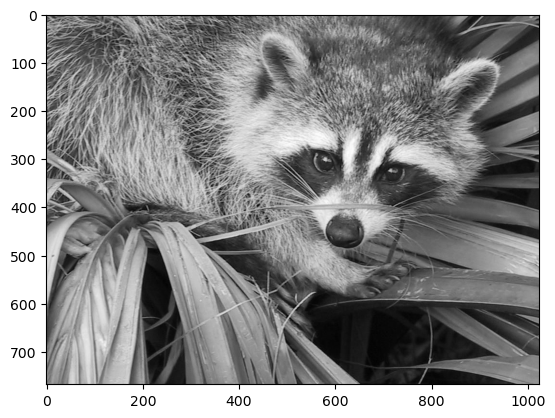

In [21]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]

# from numpy 

plt.imshow(img_gray, cmap='gray')
plt.show()

## 특이값 분해 SVD

* 행렬을 특정한 구조로 분해하는 방식
* 신호 처리와 통계학 분야에서 사용
* (1) m * n 행렬을 특이값 분해하면 3개의 행렬이 나오게 된다.
* (2) 3개의 행렬은 각각 m * m 행렬 / m * n 행렬 / n * n 행렬 이 된다.

![naver](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/240px-Singular_value_decomposition_visualisation.svg.png?type=w773)

### 대각행렬 만들기
* np.zeros() 로 대각선의 행렬 원소만 값을 가지고, 나머지는 0값인 행렬을 만들어줄 수 있다.
* (1) n x m 사이즈의 zeros 행렬을 만든 후
* (2) `np.fill_diagonal(원행렬,넣을값이 있을 행렬)` : 대각선에만 특정 값을 넣기 함수를 통해 대각선에 값을 넣어준다.


In [38]:
from numpy import linalg

# 특이값 분해
U, s, Vt = linalg.svd(img_gray)
# img_gray 는 (768,1024 사이즈)

U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [25]:
U @ s

array([-14.82934258, -15.64213083, -14.11270338, -11.83441097,
       -11.22274112, -12.0353505 , -13.47822804, -14.71083649,
       -12.81620569, -14.75900199, -16.39875751, -15.92262872,
       -14.2169179 , -15.3288541 , -14.70930414, -12.08341602,
       -13.22480892, -17.99291819, -18.52242787, -16.64750177,
       -15.22914737, -13.38720335, -10.1227432 ,  -7.90847967,
        -9.96630176, -12.48284105,  -8.99099249,  -6.41657917,
        -9.19740108, -11.01006464,  -9.07085404,  -7.4107021 ,
        -8.52112075,  -8.63687911,  -9.4459556 , -11.50462072,
       -13.96566515, -13.98513718, -11.50377238,  -9.98170743,
        -6.604055  ,  -6.3496544 ,  -7.7850486 , -10.14026006,
       -10.39553704,  -8.22701164,  -6.10672313,  -5.54959637,
        -6.85210974,  -9.68592061, -10.1594951 ,  -8.12163263,
        -7.79271711,  -9.71728949,  -9.69867931,  -7.43358508,
        -6.53419533,  -9.5636305 , -13.01997283, -14.45013707,
       -14.2560003 , -12.80652392, -11.85222051, -12.46

In [26]:
s @ Vt
# 행이나 열 수가 맞지 않기 때문에 계산 불가

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 768)

In [28]:
# 대각선에만 값이 있고, 나머지는 0값인 대각행렬 만들기
import numpy as np

# (1) 원소값이 모두 0인 768 * 1024 사이즈 행렬 Sigma 만들기
Sigma = np.zeros((U.shape[1], Vt.shape[0]))
print(Sigma)

# (2) Sigma에 대각선으로 s행렬에 있는 값 채우기
np.fill_diagonal(Sigma,s)
print(Sigma)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[410.42098224   0.           0.         ...   0.           0.
    0.        ]
 [  0.          85.56090199   0.         ...   0.           0.
    0.        ]
 [  0.           0.          63.61066707 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [30]:
# 분해된 행렬을 다시 곱해 원 행렬 만들기

img_re = U@Sigma@Vt
img_re


array([[0.45209882, 0.51876549, 0.57815529, ..., 0.47355843, 0.51387529,
        0.54524784],
       [0.33250118, 0.41485412, 0.49104706, ..., 0.46907059, 0.53181569,
        0.57887451],
       [0.26975608, 0.35210902, 0.43446196, ..., 0.47104157, 0.53378667,
        0.57692392],
       ...,
       [0.39135137, 0.40982196, 0.46304078, ..., 0.5706549 , 0.56673333,
        0.5692549 ],
       [0.37452784, 0.41374353, 0.47675608, ..., 0.56840078, 0.56419608,
        0.56419608],
       [0.37509412, 0.42158667, 0.47340078, ..., 0.56447922, 0.56027451,
        0.55635294]])

In [33]:
# 원행렬-재조립행렬 근사치확인 (1)
# 원 행렬(img_gray)과 분해 후 재조립한 행렬(img_re)간 근사치 확인 : linalg_norm
# 원 행렬 -(마이너스) 재조립 행렬 = 결과값이 작을수록 근사하다 로 해석하면 된다.
from numpy import linalg
linalg.norm(img_gray - img_re)

1.4108253216554015e-12

In [35]:
# 원행렬-재조립행렬 근사치확인 (2)
# 유사한지에 대한 Boolean 값 반환 : np.allclose()
# 유사하면 True, 유사하지 않으면 False 반환
from numpy import linalg
np.allclose(img_gray, U @ Sigma @ Vt)

True

s의 값 : 
(768,)


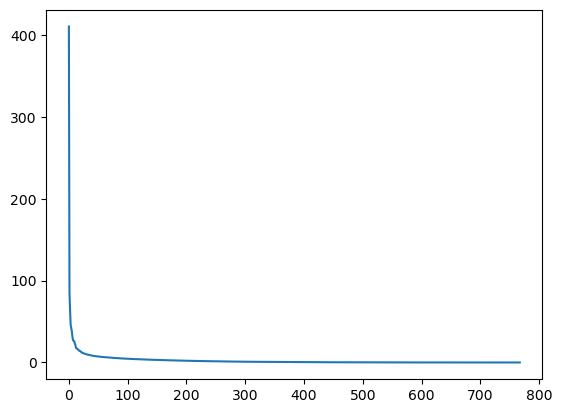

Vt의 값 : 
(1024, 1024)


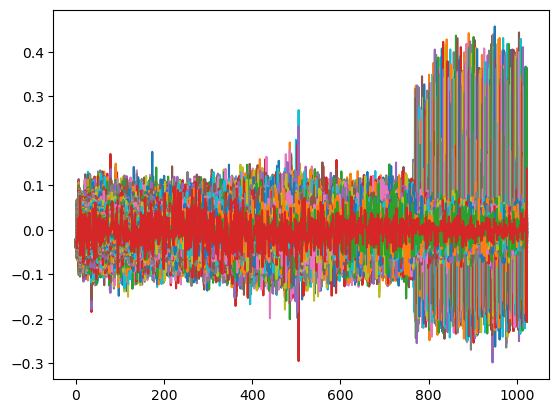

U의 값 : 
(768, 768)


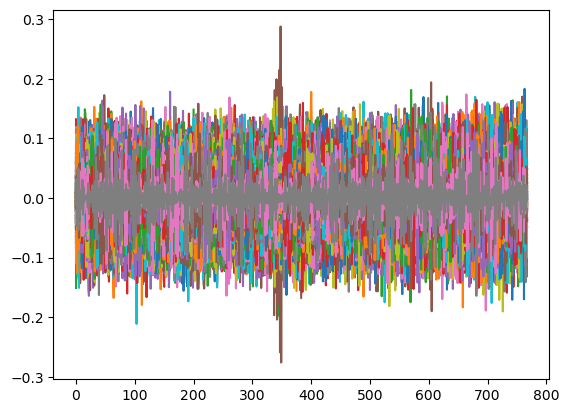

In [45]:
# 그러면, 행렬에 존재하는 값들을 plot 을 통해 뽑아보기

print("s의 값 : "), print(s.shape)
plt.plot(s)
plt.show()

print("Vt의 값 : "), print(Vt.shape)
plt.plot(Vt)
plt.show()

print("U의 값 : "), print(U.shape)
plt.plot(U)
plt.show()

### 분해된 행렬 복구 (행렬곱을 통한)
### 행렬의 이용값 범위 조정을 통한 압축률 조정

* 아.. 이를 통해서 이미지 분석이 가능하겠구나 (행렬 유사도를 통해)

aprox의 행렬 내 값 : 


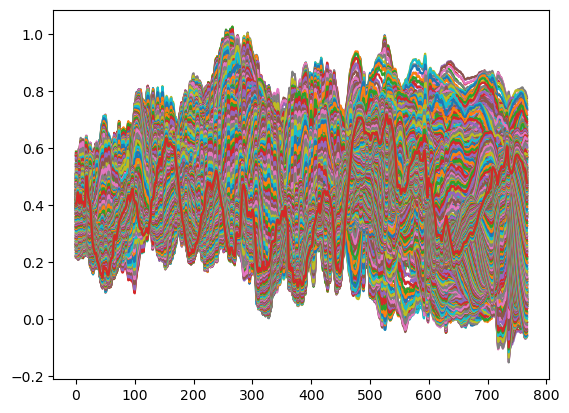

이미지를 띄워보기 : 이용 k값 변환하면서
k 값 = 10 : 이용 정보 적음 = 압축률이 높음


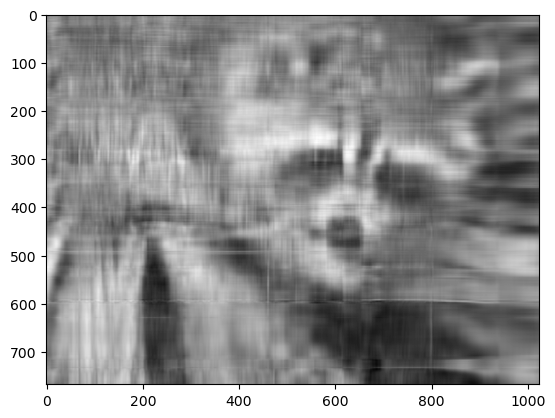

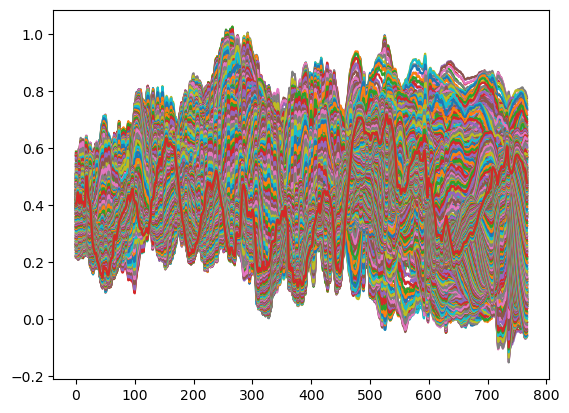

k 값 = 20 : 이용 정보 다소 적음 = 압축률이 다소 높음


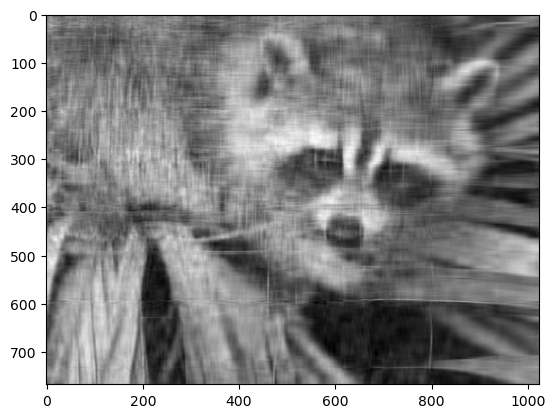

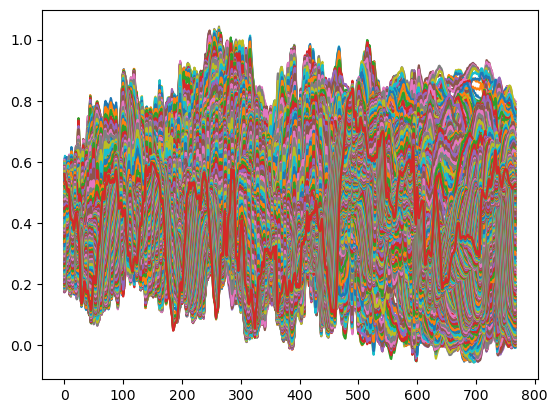

k 값 = 50 : 이용 정보 중간 = 압축률이 중간


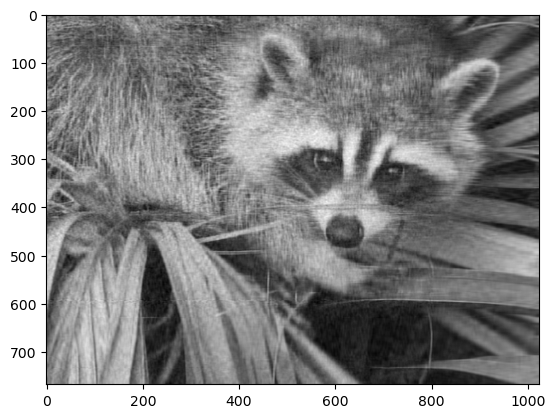

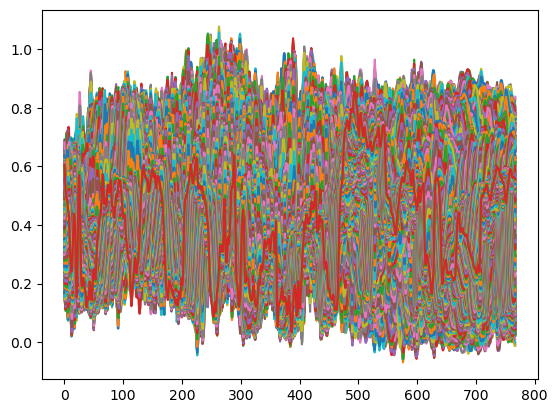

k 값 = 100 : 이용 정보 많음 = 압축률이 적음


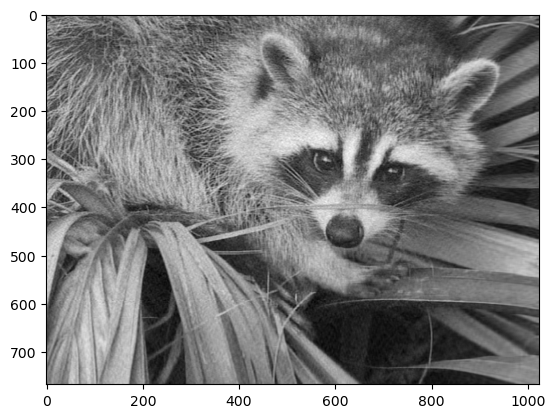

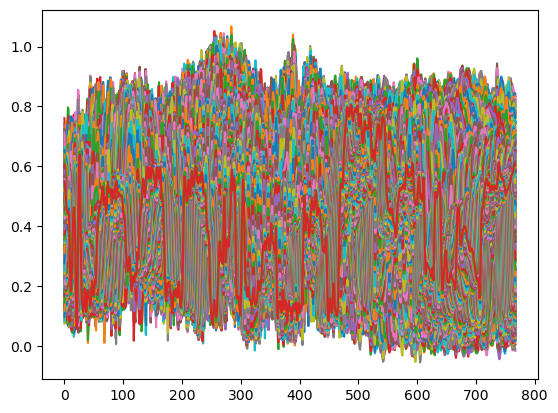

k 값 = 768 : 원본 = 압축 없음


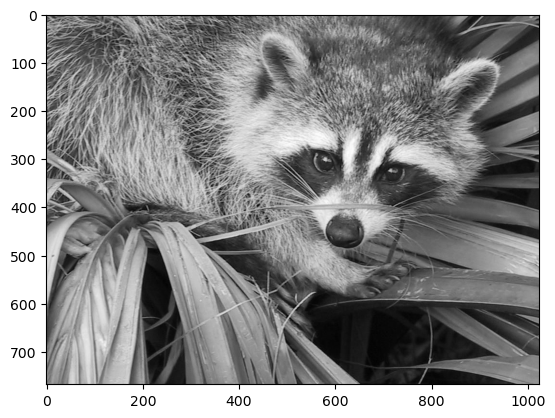

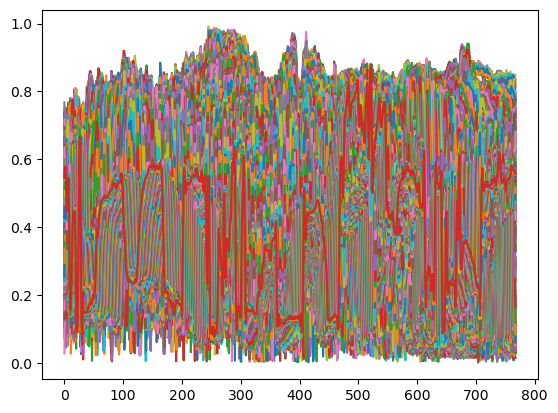

In [56]:


k = 10
aprox = U @ Sigma[:,:k] @ Vt[:k,:]
# Sigma에서는 모든 행 x 열은 10개만 사용
# Vt에서는 행을 10개만 x 열은 모두 사용

print("aprox의 행렬 내 값 : ")
plt.plot(aprox)
plt.show()

print("이미지를 띄워보기 : 이용 k값 변환하면서")
print("k 값 = 10 : 이용 정보 적음 = 압축률이 높음")
k = 10
aprox = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(aprox, cmap='gray')
plt.show()
plt.plot(aprox)
plt.show()

print("k 값 = 20 : 이용 정보 다소 적음 = 압축률이 다소 높음")
k = 20
aprox = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(aprox, cmap='gray')
plt.show()
plt.plot(aprox)
plt.show()

print("k 값 = 50 : 이용 정보 중간 = 압축률이 중간")
k = 50
aprox = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(aprox, cmap='gray')
plt.show()
plt.plot(aprox)
plt.show()

print("k 값 = 100 : 이용 정보 많음 = 압축률이 적음")
k = 100
aprox = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(aprox, cmap='gray')
plt.show()
plt.plot(aprox)
plt.show()

print("k 값 = 768 : 원본 = 압축 없음")
k = 768
aprox = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(aprox, cmap='gray')
plt.show()
plt.plot(aprox)
plt.show()

# 실습
* (1) 이미지를 불러오고
* (2) 이를 행렬로 변환
* (3) 행렬로 변환한 두 이미지 유사도 확인

* 이미지1 : pmang01.jpg
* 이미지2 : pmang02.jpg

## img 불러오기

### (1) PIL 모듈 사용
\
`from PIL import Image
img_path = 'pmang01.jpg'

img = Image.open(img_path) # gray 스케일로 읽으려면 Image.open(img_path).convert('L')
img_gray = Image.open(img_path).convert('L')`

### (2) openCV 모듈 사용
* openCV 라이브러리 설치 : 터미널에서 `pip install opencv-python`
* openCV는 RGB가 아닌, "BGR" 순서로 행렬화가 된다.
* 그렇기 때문에 RGB 순서가 되도록 convert 해줘야 한다.
\
`import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img`


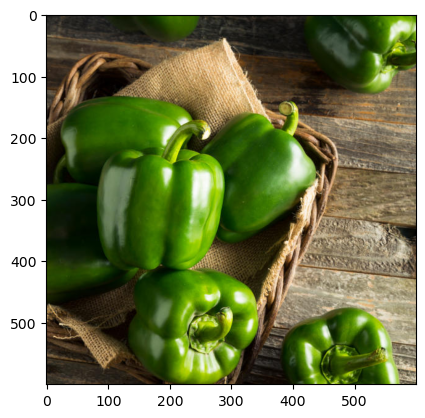

In [66]:
# 이미지 불러오기
from PIL import Image
img_path = 'pmang01.jpg'

img = Image.open(img_path) # gray 스케일로 읽으려면 Image.open(img_path).convert('L')
img_gray = Image.open(img_path).convert('L')
plt.imshow(img)
plt.show()

<class 'numpy.ndarray'>


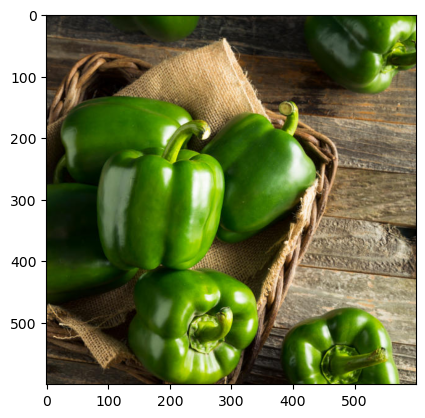

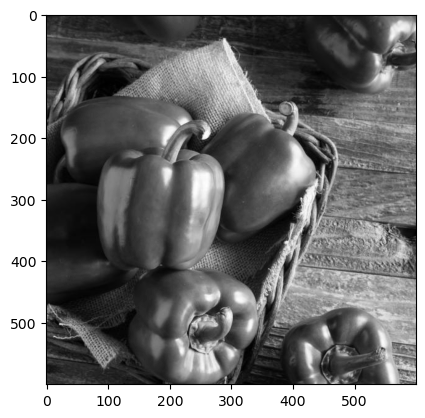

In [73]:
# 이미지 확인
print(type(img))
plt.imshow(img), plt.show()
plt.imshow(img_gray, cmap='gray'), plt.show()
pmang01 = img
pmang01_gray = img_gray

In [64]:
# array로 바꾸기
import numpy as np

img_array = np.array(img)
img_array

array([[[ 41,  40,  38],
        [ 35,  34,  32],
        [ 32,  31,  29],
        ...,
        [ 72, 125,   0],
        [ 76, 125,   0],
        [ 80, 126,   4]],

       [[ 43,  42,  40],
        [ 37,  36,  34],
        [ 34,  33,  31],
        ...,
        [ 73, 126,   0],
        [ 75, 124,   0],
        [ 78, 123,   4]],

       [[ 41,  40,  38],
        [ 35,  34,  32],
        [ 32,  31,  29],
        ...,
        [ 73, 128,   1],
        [ 74, 124,   3],
        [ 72, 120,   2]],

       ...,

       [[ 67,  63,  51],
        [ 60,  56,  44],
        [ 52,  48,  36],
        ...,
        [ 99,  93,  67],
        [104,  94,  67],
        [104,  93,  63]],

       [[ 74,  70,  58],
        [ 69,  65,  53],
        [ 64,  60,  48],
        ...,
        [115, 109,  87],
        [103,  95,  72],
        [ 92,  82,  57]],

       [[ 77,  73,  61],
        [ 75,  71,  59],
        [ 73,  69,  57],
        ...,
        [144, 139, 120],
        [116, 108,  87],
        [ 91,  80,  58]]

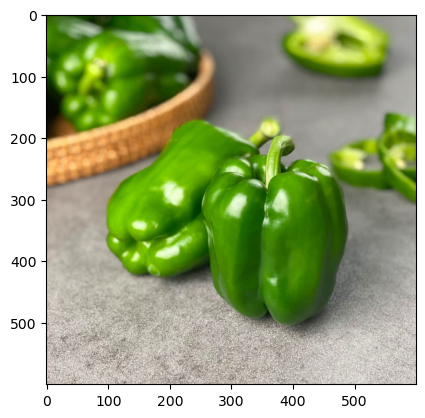

(<matplotlib.image.AxesImage at 0x22b51877400>, None)

In [79]:
import cv2
img_path = 'pmang02.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB 로 컨버트

pmang02 = img

plt.imshow(pmang02), plt.show()

In [83]:
# 유사도 측정 1 (차이값)
from numpy import linalg
print("차이도 : "), print(linalg.norm(pmang01 - pmang02))

print("\n")

# 유사도 측정 2 (Boolean)
from numpy import linalg
print("유사도(Boolean) : "), np.allclose(pmang01, pmang02)

차이도 : 
153748.4596020396


유사도(Boolean) : 


(None, False)